In [ ]:
test <- read.table("testBordeaux.txt", header = TRUE)

head(test)
test1 <- table(test$vin, test$qual)
test1
test2 <- as.data.frame.matrix(test1)

str(test2)


,juge,vin,qual
,<int>,<chr>,<chr>
1,1,Cru_Bourgeois,mediocre
2,1,Grand_Cru_classe,mediocre
3,1,Vin_de_table,boring
4,1,Bordeaux_d_origine,boring
5,1,Vin_de_marque,boring
6,2,Cru_Bourgeois,good


                    
                     boring excellent good mediocre
  Bordeaux_d_origine     22        36   68       74
  Cru_Bourgeois           5        45  126       24
  Grand_Cru_classe        1        87   93       19
  Vin_de_marque          59         0   30      111
  Vin_de_table          148         0    0       52

'data.frame':	5 obs. of  4 variables:
 $ boring   : int  22 5 1 59 148
 $ excellent: int  36 45 87 0 0
 $ good     : int  68 126 93 30 0
 $ mediocre : int  74 24 19 111 52


[1]  74  24  19 111  52

In [10]:
test2

,boring,excellent,good,mediocre
,<int>,<int>,<int>,<int>
Bordeaux_d_origine,22,36,68,74
Cru_Bourgeois,5,45,126,24
Grand_Cru_classe,1,87,93,19
Vin_de_marque,59,0,30,111
Vin_de_table,148,0,0,52


In [8]:
sum(test$qual[test$vin == "Vin_de_table"] == "mediocre")

[1] 52

In [16]:
library(FactoMineR)

In [18]:
vin_acp <- PCA(test2, scale.unit = TRUE)

summary(vin_acp)


Call:
PCA(X = test2, scale.unit = TRUE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4
Variance               3.065   0.732   0.203   0.000
% of var.             76.632  18.301   5.067   0.000
Cumulative % of var.  76.632  94.933 100.000 100.000

Individuals
                       Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2  
Bordeaux_d_origine |  0.713 |  0.099  0.064  0.019 |  0.690 12.998  0.937 |
Cru_Bourgeois      |  1.891 |  1.724 19.395  0.831 | -0.045  0.056  0.001 |
Grand_Cru_classe   |  2.249 |  2.117 29.250  0.886 | -0.440  5.279  0.038 |
Vin_de_marque      |  2.077 | -1.750 19.990  0.711 |  1.116 34.008  0.289 |
Vin_de_table       |  2.558 | -2.190 31.301  0.733 | -1.321 47.660  0.267 |
                    Dim.3    ctr   cos2  
Bordeaux_d_origine  0.149  2.203  0.044 |
Cru_Bourgeois      -0.776 59.344  0.168 |
Grand_Cru_classe    0.619 37.845  0.076 |
Vin_de_marque       0.059  0.341  0.001 |
Vin_de_table       -0.052  0.267  0.000 |

Variables


In [26]:
vin_acp$var$cos2

,Dim.1,Dim.2,Dim.3,Dim.4
boring,0.7549272,0.24390251,0.00117026,3.486092e-64
excellent,0.8759417,0.01241928,0.11163898,1.231330e-64
good,0.8897814,0.03138873,0.07882992,2.336081e-64
mediocre,0.5446335,0.44431181,0.01105471,1.351712e-64


In [27]:
vin_acp$var$contrib

,Dim.1,Dim.2,Dim.3,Dim.4
boring,24.6283,33.318999,0.5773536,1.202443e-30
excellent,28.5762,1.696571,55.0776296,4.247174e-31
good,29.0277,4.287947,38.8911221,8.057744e-31
mediocre,17.7678,60.696483,5.4538947,4.662402e-31


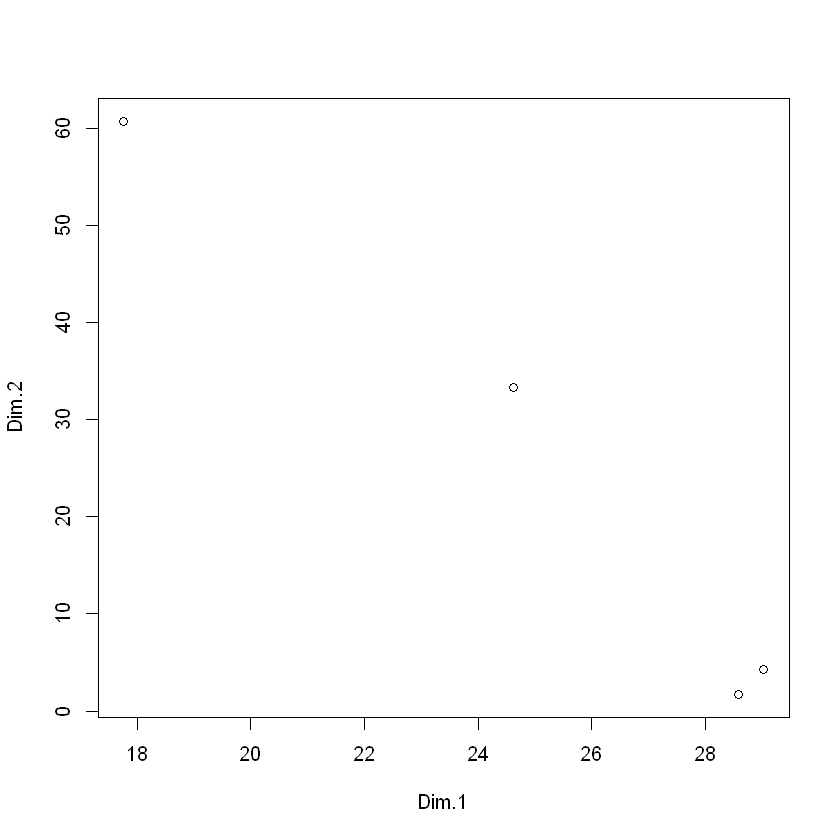

In [29]:
plot(vin_acp$var$contrib)

In [23]:
eig <- vin_acp$eig
eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,3.065284e+00,7.663210e+01,76.63210
comp 2,7.320223e-01,1.830056e+01,94.93265
comp 3,2.026939e-01,5.067347e+00,100.00000
comp 4,2.899175e-32,7.247937e-31,100.00000


In [ ]:


test2.d <- dist(test2)

hc_vin <- hclust(test2.d, method = "ward.D2")

hc_vin

classes <- cutree(hc_vin, k = 3) # Dividir os dados em k = 3 classes

classes



Call:
hclust(d = test2.d, method = "ward.D2")

Cluster method   : ward.D2 
Distance         : euclidean 
Number of objects: 5 


Bordeaux_d_origine      Cru_Bourgeois   Grand_Cru_classe      Vin_de_marque 
                 1                  2                  2                  1 
      Vin_de_table 
                 3